<a href="https://colab.research.google.com/github/Kudryai/DataAnalyst/blob/main/%D0%9A%D1%83%D0%B4%D1%80%D1%8F%D0%B2%D1%86%D0%B5%D0%B2_%D0%90_%D0%98_%D0%9F%D0%BE%D0%BB%D0%BD%D1%8B%D0%B9_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Статистический анализ данных

*  Импорт библиотек и датасетов

In [ ]:
!gdown --id 1j3uYm-h2z3lHjHbgMdVZHsejpFizsNMH # Импорт датасета с вакансиями
!gdown --id 1xA4IOW-FTXj_zIA1WYwDaLj36V0M0CYe # Импорт датасета с курсами портала obrazoval.ru

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1j3uYm-h2z3lHjHbgMdVZHsejpFizsNMH
To: /content/ITVacant.pkl
100% 96.5M/96.5M [00:01<00:00, 85.1MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xA4IOW-FTXj_zIA1WYwDaLj36V0M0CYe
To: /content/ITCourses.pkl
100% 433k/433k [00:00<00:00, 93.9MB/s]


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from math import nan
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
dfCourses = pd.read_pickle('ITCourses.pkl')
dfVacancy = pd.read_pickle('ITVacant.pkl')

#  1.Структурирование данных

*  Удалим колонку описания вакансий, т.к в ней нет информации для статистического анализа.

In [ ]:
dfVacancy.drop(dfVacancy.columns[1], axis = 1, inplace=True)

*  Переводим подспециализацию в 3 категории. Всего категорий 24, но остальные 21 категорий представляют маленькую выборку.
    - 1 - Информационные технологии, интернет, телеком  (22874 вакансии)
    - 2 - Продажи (3827 вакансий)
    - 3 - Управление персоналом, тренинги (970 вакансий)

In [ ]:
def underspec_group(a):
    try:
        if 'информационные' in a.lower():
            return 'IT'
        if 'продажи' in a.lower():
            return 'Продажи'
        if 'управление персоналом' in a.lower():
            return 'HR'
    except:
        return nan

dfVacancy['Подспециализация'] = dfVacancy['Подспециализация'].apply(underspec_group)
dfVacancy['Подспециализация'].dropna()
dfVacancy['Подспециализация'].value_counts()

IT         22874
Продажи     3827
HR           970
Name: Подспециализация, dtype: int64

*  Выделение группы исходя от специализации, оценив датасет по вакансиям и их специализации выделили 5 групп:
    - 1 - Разработчик
    - 2 - Системный администратор / DevOps
    - 3 - Аналитик
    - 4 - Кибербезопасность

In [ ]:
def spec_group(a):
    try:
        for i in range(len(a)):
            if 'разработка' in a[i].lower():
                return 'Разработка'
            if 'системный админ' in a[i].lower():
                return 'Системный администратор'
            if 'аналитик' in a[i].lower():
                return 'Аналитик'
            if 'компьютерная безопас' in a[i].lower():
                return 'Кибербезопасность'
    except:
        return nan

dfVacancy['Специализация'] = dfVacancy['Специализация'].apply(spec_group)
dfVacancy['Специализация'].dropna()
dfVacancy['Специализация'].value_counts()

Разработка                 15849
Системный администратор     5840
Аналитик                    3149
Кибербезопасность           1049
Name: Специализация, dtype: int64

*  Проверяем структуру должностей

In [ ]:
dfVacancy['Должность'].value_counts()[:10]

Системный администратор            2478
Программист 1C                     2286
Инженер-программист                 490
Аналитик                            323
Системный аналитик                  229
Бизнес-аналитик                     186
Frontend-разработчик                162
Ведущий системный администратор     157
Web-разработчик                     132
Ведущий инженер-программист         112
Name: Должность, dtype: int64

*   Приводим список городов к федеральным округам, их 8. Я использовал парсинг всех городов России и их федеральных округов, после преобразовал в отдельном файле города в округа.

In [ ]:
dfVacancy.rename(columns = {'Город':'Округ'}, inplace=True)
dfVacancy['Округ'].value_counts()

Центральный          9977
Сибирский            4112
Приволжский          4055
Северо-Западный      3884
Южный                2822
Уральский            2563
Дальневосточный       752
Северо-Кавказский     231
Name: Округ, dtype: int64

*   Очищаем все наши столбцы от пустых данных.

In [ ]:
dfVacancy.dropna(inplace=True)
dfVacancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20862 entries, 1 to 145990
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Должность         20862 non-null  object        
 1   Подспециализация  20862 non-null  object        
 2   Специализация     20862 non-null  object        
 3   Средняя_зарплата  20862 non-null  float64       
 4   Округ             20862 non-null  object        
 5   Навыки            20862 non-null  object        
 6   Дата              20862 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.3+ MB


*   Оцениваем наш второй датасет, с курсами. Здесь наблюдаем так же, не нужные колонки, а именно: Описание, ссылки, комментарии.

In [ ]:
dfCourses.drop(dfCourses.columns[[5, 6, 8]], axis = 1, inplace=True)
dfCourses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 642
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Название      588 non-null    object 
 1   Компания      588 non-null    object 
 2   Цена          588 non-null    int64  
 3   РейтингКомп   588 non-null    float64
 4   РейтингКурса  588 non-null    float64
 5   НавыкиПриобр  588 non-null    object 
 6   ЧасыОб        582 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 36.8+ KB


#  2.Определение типа данных в представленных датасетах

In [ ]:
dfVacancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20862 entries, 1 to 145990
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Должность         20862 non-null  object        
 1   Подспециализация  20862 non-null  object        
 2   Специализация     20862 non-null  object        
 3   Средняя_зарплата  20862 non-null  float64       
 4   Округ             20862 non-null  object        
 5   Навыки            20862 non-null  object        
 6   Дата              20862 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.3+ MB


* Определение типа данных для датасета Вакансий

- 0   Должность ---- Категориальный показатель                                                                   
- 1   Подспециализация ---- Категориальный показатель      
- 2   Специализация ---- Категориальный показатель      
- 3   Средняя_зарплата ---- Количественный показатель  
- 4   Округ ---- Категориальный показатель        
- 5   Навыки ----  Категориальный показатель  
- 6   Дата  ---- Порядковый показатель

In [ ]:
dfCourses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 642
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Название      588 non-null    object 
 1   Компания      588 non-null    object 
 2   Цена          588 non-null    int64  
 3   РейтингКомп   588 non-null    float64
 4   РейтингКурса  588 non-null    float64
 5   НавыкиПриобр  588 non-null    object 
 6   ЧасыОб        582 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 36.8+ KB


- 0   Название ---- Категориальный показатель 
- 1   Компания ---- Категориальный показатель
- 2   Цена ---- Количественный показатель  
- 3   РейтингКомп ---- Порядковый показатель
- 4   РейтингКурса ----Порядковый показатель
- 5   НавыкиПриобр ---- Категориальный показатель
- 6   ЧасыОб ---- Количественный показатель

#  3.Визуализация данных согласно их типу

* Настройка цветовых палитр

In [ ]:
plt.rcParams['axes.facecolor'] = '#e0defa'
colors = sns.color_palette('rocket')[0:5]
sns.set_palette('flare')
sns.set_context("notebook")
sns.color_palette('rocket')[0:10]

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

*  Построим гистограммы для количественных показателей датасета с курсами их кол-во и цену.

(0.0, 130.0)

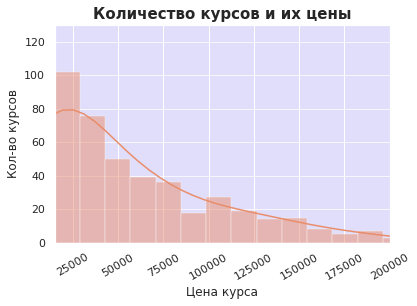

In [ ]:
sns.histplot(data=dfCourses['Цена'], x=dfCourses['Цена'], kde=True)
plt.xticks(rotation=30)
plt.ylabel('Кол-во курсов')
plt.title('Количество курсов и их цены',fontweight="bold",fontsize=15)
plt.xlabel('Цена курса')
plt.grid(axis='y', alpha=0.75)
plt.xlim(15000, 200000)
plt.ylim(0, 130)

* Построим гистограмму кол-во курсов и время обучения

In [ ]:
def hours_int(hours):
    try:
        return int(hours)
    except:
        return 0

dfCourses['ЧасыОб'] = dfCourses['ЧасыОб'].apply(hours_int)

filter = dfCourses['ЧасыОб'] != 0   # убираем нулевые значения
dfCourses = dfCourses[filter]

(0.0, 350.0)

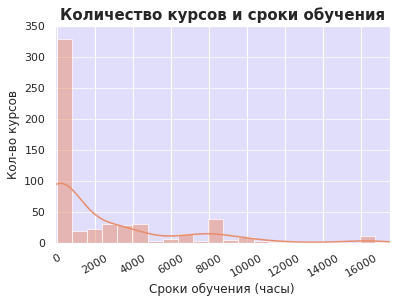

In [ ]:
sns.histplot(data=dfCourses['ЧасыОб'], x=dfCourses['ЧасыОб'], kde=True)
plt.xticks(rotation=30)
plt.ylabel('Кол-во курсов')
plt.title('Количество курсов и сроки обучения',fontweight="bold",fontsize=15)
plt.xlabel('Сроки обучения (часы)')
plt.grid(axis='y', alpha=0.75)
plt.xlim(-100, 17500)
plt.ylim(0, 350)

*  Теперь расмотрим количественный показатель - Зарплату в предложенных вакансиях

(15000.0, 350000.0)

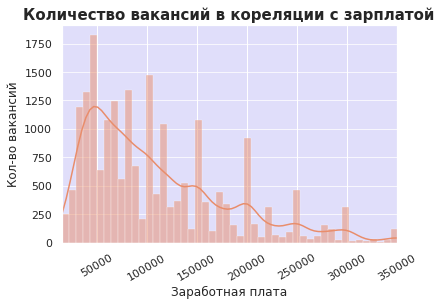

In [ ]:
sns.histplot(data=dfVacancy['Средняя_зарплата'], x=dfVacancy['Средняя_зарплата'], kde=True)
plt.xticks(rotation=30)
plt.ylabel('Кол-во вакансий')
plt.title('Количество вакансий в кореляции с зарплатой',fontweight="bold",fontsize=15)
plt.xlabel('Заработная плата')
plt.grid(axis='y', alpha=0.75)
plt.xlim(15000, 350000)

* Гистограмма кол-во курсов по их оценке пользователей

(0.0, 250.0)

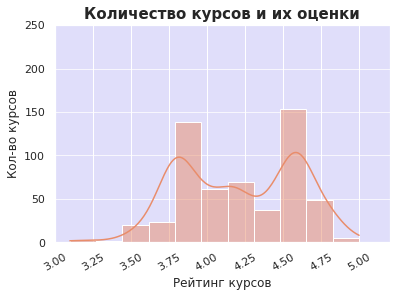

In [ ]:
sns.histplot(data=dfCourses, x=dfCourses['РейтингКурса'], kde=True)
plt.xticks(rotation=30)
plt.ylabel('Кол-во курсов')
plt.title('Количество курсов и их оценки',fontweight="bold",fontsize=15)
plt.xlabel('Рейтинг курсов')
plt.grid(axis='y', alpha=0.75)
plt.xlim(3, 5.2)
plt.ylim(0, 250)

*  Гистограмма кол-во курсов и рейтинг компаний

(0.0, 350.0)

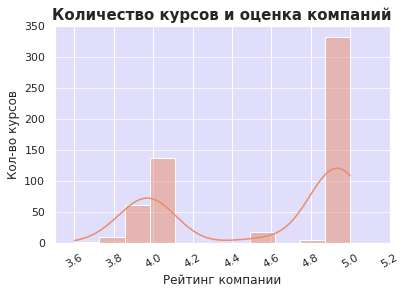

In [ ]:
sns.histplot(data=dfCourses, x=dfCourses['РейтингКомп'], kde=True)
plt.xticks(rotation=30)
plt.ylabel('Кол-во курсов')
plt.title('Количество курсов и оценка компаний',fontweight="bold",fontsize=15)
plt.xlabel('Рейтинг компании')
plt.grid(axis='y', alpha=0.75)
plt.xlim(3.5, 5.2)
plt.ylim(0, 350)

* Столбчатая диаграмма кол-во компаний по их рейтингу

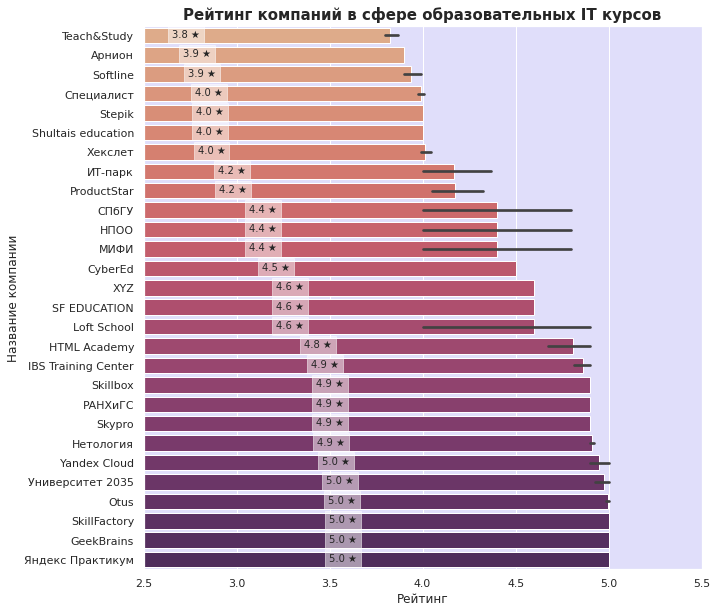

In [ ]:
sorted_barplot = dfCourses.groupby(["Компания"])['РейтингКомп'].aggregate(np.mean).reset_index().sort_values('РейтингКомп',)

plt.figure(figsize=(10, 10))
plt.xlim(2.5,5.5)
axf = sns.barplot(data=dfCourses, x=dfCourses['РейтингКомп'], y=dfCourses['Компания'], palette='flare',order=sorted_barplot['Компания'])
rct = axf.patches
lblz = [f"{round(i,1)} ★" for i in sorted_barplot['РейтингКомп']]
i = -0.60
plt.ylabel('Название компании')
plt.xlabel('Рейтинг')
plt.title('Рейтинг компаний в сфере образовательных IT курсов',fontweight="bold",fontsize=15)
for rect, label in zip(rct, lblz):
    height = rect.get_height()
    axf.text(
        rect.get_x() + rect.get_width() / 1.4, height+i, label, ha="center",
         va="bottom", bbox=dict(facecolor='white', alpha=0.5),
        fontsize=10)
    i += 1

*  Анализ влияния между свойствами в датасете Курсов

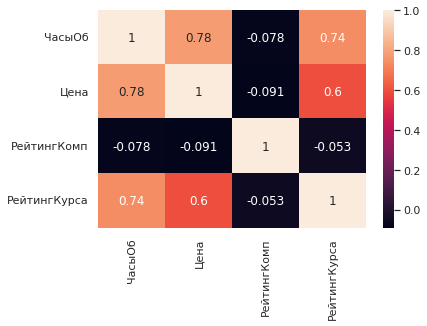

In [ ]:
ran = ['ЧасыОб','Цена','РейтингКомп', 'РейтингКурса']
hm = sns.heatmap(dfCourses[ran].corr(method = 'spearman'), annot=True)

* Столбчатая диаграмма кол-во вакансий по федеральным округам

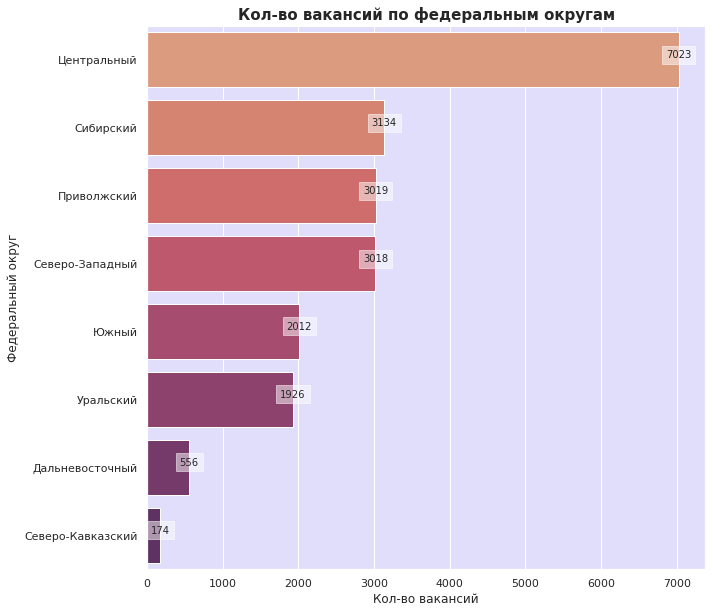

In [ ]:
federal = dfVacancy['Округ'].value_counts()

plt.figure(figsize=(10, 10))
axf = sns.barplot(data=dfVacancy, y = federal.index, x=federal, palette='flare')
rct = axf.patches
lblz = [f"{i}" for i in federal]
i = -0.8
plt.ylabel('Федеральный округ')
plt.xlabel('Кол-во вакансий')
plt.title('Кол-во вакансий по федеральным округам',fontweight="bold",fontsize=15)
for rect, label in zip(rct, lblz):
    height = rect.get_height()
    axf.text(
        rect.get_x() + rect.get_width() / 1, height+i, label, ha="center",
         va="bottom", bbox=dict(facecolor='white', alpha=0.5),
        fontsize=10)
    i += 1

*  Круговая диаграмма количества вакансий в специализации

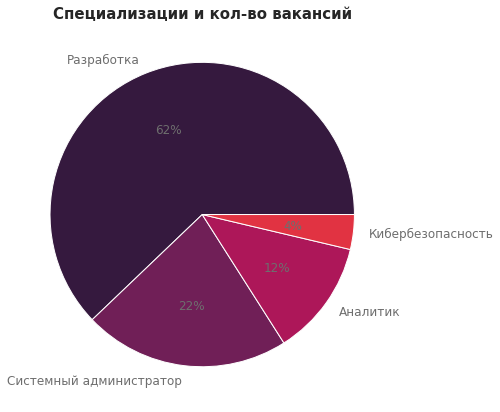

In [ ]:
special = dfVacancy['Специализация'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(special, labels = special.index, textprops=
        {'fontsize':12, 'color':'#6e6e6e'} , labeldistance=1.1, colors=colors,autopct='%.0f%%')
plt.title('Специализации и кол-во вакансий', fontweight="bold",fontsize=15)
plt.show()

*  Круговые диаграммы для каждой специализации с 20 ключевыми навыками

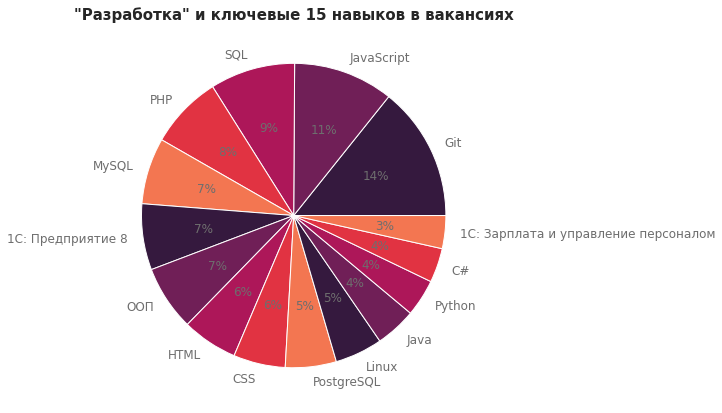

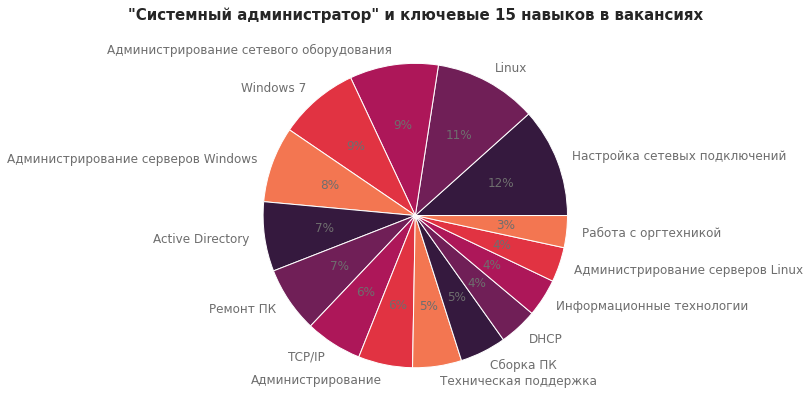

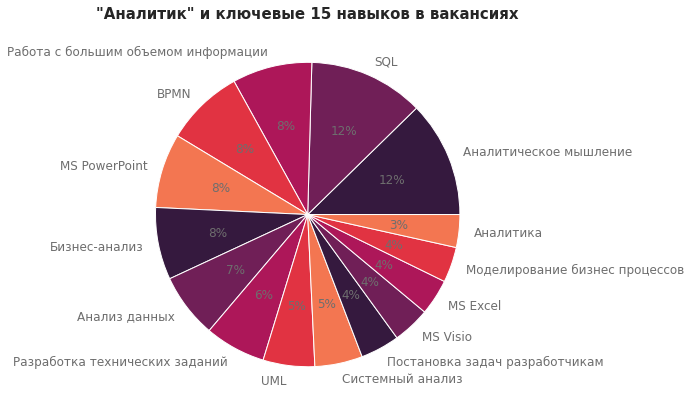

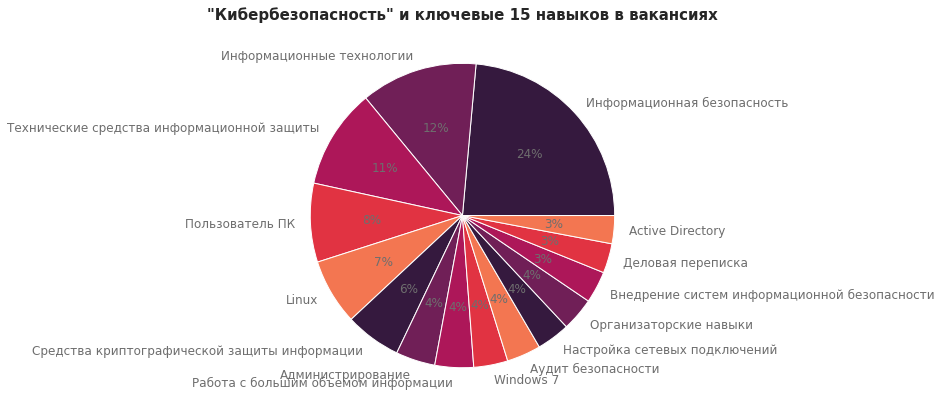

In [ ]:
list_spec =['Разработка','Системный администратор','Аналитик', 'Кибербезопасность']

for name in list_spec:
        filter_spec = dfVacancy['Специализация'] == name 
        skills_deployment = dfVacancy[filter_spec]
        pattern_deploy = skills_deployment['Навыки'].explode().value_counts()[:15]

        plt.figure(figsize=(7, 7))
        plt.pie(pattern_deploy, labels = pattern_deploy.index, textprops=
                {'fontsize':12, 'color':'#6e6e6e'} , labeldistance=1.1, colors=colors,autopct='%.0f%%')
        plt.title(f'"{name}" и ключевые 15 навыков в вакансиях', fontweight="bold",fontsize=15)
        plt.show()


#  4.Гипотеза о виде распределения

* Проверка H0 нормального распределения для рейтинга курса, рейтинга компании, цены курса по критерию Шапиро-Уилка

In [ ]:
stats.shapiro(dfCourses['РейтингКомп'].dropna())

ShapiroResult(statistic=0.7262639999389648, pvalue=2.3259633485031396e-29)

1) H0 отклонена, распределение данных о рейтинге компании не подчинено нормальному закону распределения.

In [ ]:
stats.shapiro(dfCourses['РейтингКурса'])

ShapiroResult(statistic=0.9328259825706482, pvalue=3.264902894751804e-15)

2) H0 отклонена, распределение данных о рейтинге курса не подчинено нормальному закону распределения.

In [ ]:
stats.shapiro(dfCourses['ЧасыОб'])

ShapiroResult(statistic=0.6781591176986694, pvalue=2.616034230791711e-31)

3) H0 отклонена, распределение данных о часах обучения не подчинено нормальному закону распределения.

In [ ]:
stats.shapiro(dfCourses['Цена'])

ShapiroResult(statistic=0.5357358455657959, pvalue=5.7944793705151285e-36)

4)  H0 отклонена, распределение данных о цене курса не подчинено нормальному закону распределения.
___________________________________________________________________________________________________________

* Проверка H0 нормального распределения для заработной платы по коэффициентам эксцесса и асимметрии.

In [ ]:
dfVacancy['Средняя_зарплата'].skew()

1.7873687224853474

In [ ]:
dfVacancy['Средняя_зарплата'].kurtosis()

6.036500460975391

1)  H0 отклонена, распределение данных о средней зарплате не подчинено нормальному закону распределения.
___________________________________________________________________________________________________________

# Гипотеза №1: Цена за курс напрямую зависит от его продолжительности?

**Структурированные данные для проверки гипотезы №1**

In [ ]:
dfCourses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 642
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Название      563 non-null    object 
 1   Компания      563 non-null    object 
 2   Цена          563 non-null    int64  
 3   РейтингКомп   563 non-null    float64
 4   РейтингКурса  563 non-null    float64
 5   НавыкиПриобр  563 non-null    object 
 6   ЧасыОб        563 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


**Тип данных**

- 0   Название ---- Категориальный показатель 
- 1   Компания ---- Категориальный показатель
- 2   Цена ---- Количественный показатель  
- 3   РейтингКомп ---- Порядковый показатель
- 4   РейтингКурса ----Порядковый показатель
- 5   НавыкиПриобр ---- Категориальный показатель
- 6   ЧасыОб ---- Количественный показатель

**Визуализация (табличная и | или графическая)**

*  Построим гистограммы для количественных показателей датасета с курсами их кол-во и цену.

(0.0, 130.0)

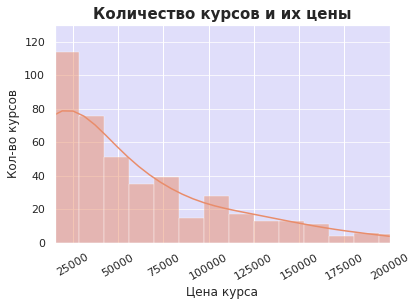

In [ ]:
sns.histplot(data=dfCourses['Цена'], x=dfCourses['Цена'], kde=True)
plt.xticks(rotation=30)
plt.ylabel('Кол-во курсов')
plt.title('Количество курсов и их цены',fontweight="bold",fontsize=15)
plt.xlabel('Цена курса')
plt.grid(axis='y', alpha=0.75)
plt.xlim(15000, 200000)
plt.ylim(0, 130)

* Построим гистограмму кол-во курсов и время обучения

(0.0, 350.0)

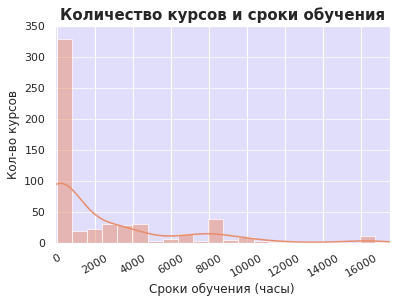

In [ ]:
sns.histplot(data=dfCourses['ЧасыОб'], x=dfCourses['ЧасыОб'], kde=True)
plt.xticks(rotation=30)
plt.ylabel('Кол-во курсов')
plt.title('Количество курсов и сроки обучения',fontweight="bold",fontsize=15)
plt.xlabel('Сроки обучения (часы)')
plt.grid(axis='y', alpha=0.75)
plt.xlim(-100, 17500)
plt.ylim(0, 350)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


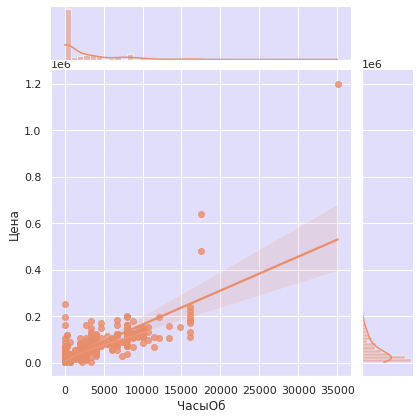

In [ ]:
sns.jointplot('ЧасыОб', 'Цена', data=dfCourses, kind="reg")

Парная регрессия (OLS) Цена - Часы обучения

In [ ]:
results1 = smf.ols('Цена ~ ЧасыОб', data=dfCourses).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Цена   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     877.5
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          8.40e-117
Time:                        14:06:33   Log-Likelihood:                -6852.7
No. Observations:                 563   AIC:                         1.371e+04
Df Residuals:                     561   BIC:                         1.372e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.808e+04   2333.843      7.746      0.000    1.35e+04    2.27e+04
ЧасыОб        14.6162      0.493     29.623      0.000      13.647      15.585
==============================================================================
Omnibus:                      741.610   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           160622.827
Skew:                           6.451   Prob(JB):                         0.00
Kurtosis:                      84.736   Cond. No.                     5.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*  Делим кол-во часов обучения на 3 группы:
  - Короткие до 1000 часов - 42 дня
  - Средние от 1000 до 5000 часов - 208 дней
  - Долгие от 5000 и до самого долгого.

In [ ]:
dfModelRegress = dfCourses.copy()

In [ ]:

def time_courses(time):
  if time < 1000:
    return 1
  if 1000 < time < 5000:
    return 2
  if 5000 < time:
    return 3

dfCourses['ЧасыОб'] = dfCourses['ЧасыОб'].apply(time_courses)

**Выбранный метод анализа**

* Так как часы обучения являются количественными как и цена курса, и мы проверили их на нормальность (распредление обоих не нормальное), мы проверяем на кол-во групп ( часы обучение были переведены в группы) их у нас > 2, зависимость у данных отсутствует, следовательно из этого мы выбираем метод **Краскала-Уоллиса**

**Результат реализации метода**

*  Очищаем от выбросов boxplot

In [ ]:
dfCoursesH1 = dfCourses.drop(index=[60,72,108,199,594,30,54,125,627,526,302,245,173,142,110,78,52,153])

*  Строим boxplot по зависимости: цена от продолжительности обучения.
У нас есть 3 категории которые явно отражают зависимость:
  - 1 Короткие до 1000 часов - 42 дня
  - 2 Средние от 1000 до 5000 часов - 208 дней
  - 3 Долгие от 5000 часов и до самого долгого.

(0.0, 240000.0)

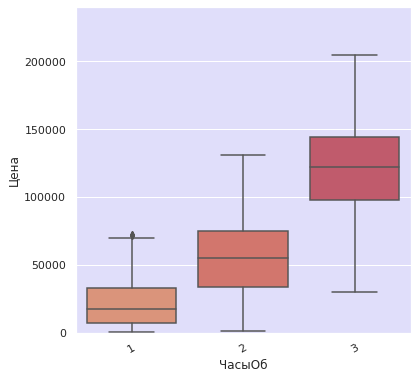

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
plt.xticks(rotation=30)
fig = sns.boxplot(x='ЧасыОб', y='Цена', data=dfCoursesH1)
plt.ylim(0,240000)

* Используем критерий Краскала-Уоллиса




In [ ]:
dfd1=np.array(dfCourses[dfCourses['ЧасыОб']== 1]['Цена'])
dfd2=np.array(dfCourses[dfCourses['ЧасыОб']== 2]['Цена'])
dfd3=np.array(dfCourses[dfCourses['ЧасыОб']== 3]['Цена'])
stats.mstats.kruskalwallis(dfd1,dfd2,dfd3)

KruskalResult(statistic=304.3436873863661, pvalue=8.177263321941189e-67)

**Вывод**

* Так как полученное значение p-value < 0.05 (уровень значимости), то при уровне значимости 0.05 гипотеза Н0 отклоняется. Следовательно продолжительность курса значительно влияет на цену онлайн курса.

# Гипотеза №2: Зарплата напрямую зависит от федерального округа?

**Структурированные данные для проверки гипотезы №2**

In [ ]:
dfVacancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20862 entries, 1 to 145990
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Должность         20862 non-null  object        
 1   Подспециализация  20862 non-null  object        
 2   Специализация     20862 non-null  object        
 3   Средняя_зарплата  20862 non-null  float64       
 4   Округ             20862 non-null  object        
 5   Навыки            20862 non-null  object        
 6   Дата              20862 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.3+ MB


**Тип данных**

- 0   Должность ---- Категориальный показатель                                                                   
- 1   Подспециализация ---- Категориальный показатель      
- 2   Специализация ---- Категориальный показатель      
- 3   Средняя_зарплата ---- Количественный показатель  
- 4   Округ ---- Категориальный показатель        
- 5   Навыки ----  Категориальный показатель  
- 6   Дата  ---- Порядковый показатель

**Визуализация (табличная и | или графическая)**

* Построим Barplot для федерального округа и кол-во вакансий)

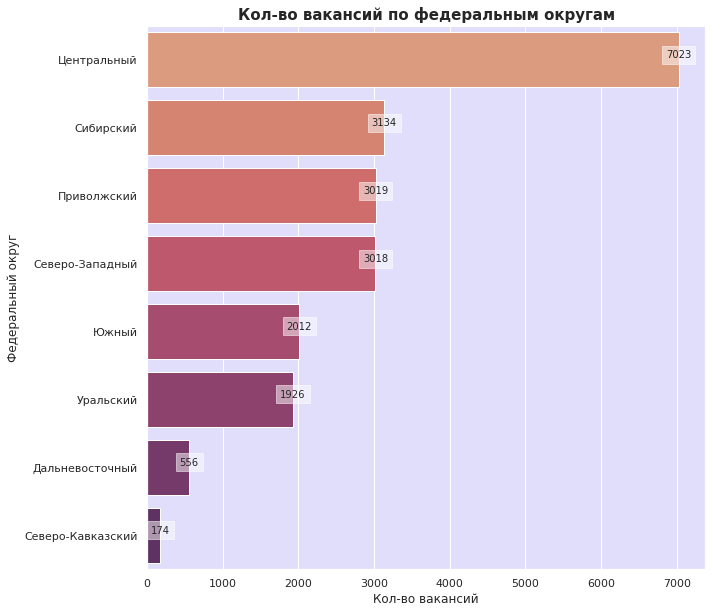

In [ ]:
plt.figure(figsize=(10, 10))
axf = sns.barplot(data=dfVacancy, y = federal.index, x=federal, palette='flare')
rct = axf.patches
lblz = [f"{i}" for i in federal]
i = -0.8
plt.ylabel('Федеральный округ')
plt.xlabel('Кол-во вакансий')
plt.title('Кол-во вакансий по федеральным округам',fontweight="bold",fontsize=15)
for rect, label in zip(rct, lblz):
    height = rect.get_height()
    axf.text(
        rect.get_x() + rect.get_width() / 1, height+i, label, ha="center",
         va="bottom", bbox=dict(facecolor='white', alpha=0.5),
        fontsize=10)
    i += 1

* Построим гистограмму зарплаты и кол-во вакансий

(15000.0, 350000.0)

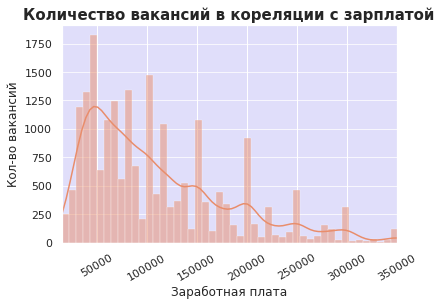

In [ ]:
sns.histplot(data=dfVacancy['Средняя_зарплата'], x=dfVacancy['Средняя_зарплата'], kde=True)
plt.xticks(rotation=30)
plt.ylabel('Кол-во вакансий')
plt.title('Количество вакансий в кореляции с зарплатой',fontweight="bold",fontsize=15)
plt.xlabel('Заработная плата')
plt.grid(axis='y', alpha=0.75)
plt.xlim(15000, 350000)

**Выбранный метод анализа**

* Так как зарплата является количественным типом, а федеральные округа порядковыми, и мы их проверили  на нормальность (распредление обоих не нормальное), далее мы проверяем на кол-во групп их у нас > 2, зависимость у данных отсутствует, следовательно из этого мы выбираем метод **Краскала-Уоллиса**

**Результат реализации метода**

*  Обрабатываем выбросы в цикле на все округа.

In [ ]:
dfVacancys = dfVacancy
federal = ['Южный','Центральный', 'Сибирский', 'Приволжский','Северо-Западный',
           'Уральский','Дальневосточный','Северо-Кавказский']
for i in range(len(federal)):
    percentile3 = np.percentile(dfVacancy[dfVacancy['Округ'] == f'{federal[i]}']['Средняя_зарплата'].dropna(), 2) # 3% процентиль
    percentile97 = np.percentile(dfVacancy[dfVacancy['Округ'] == f'{federal[i]}']['Средняя_зарплата'].dropna(), 98) # 97% процентиль
    dfVacancys = dfVacancys.drop(dfVacancys.loc[(dfVacancy['Округ'] == f'{federal[i]}') & (dfVacancys['Средняя_зарплата'] > percentile3) & (dfVacancys['Средняя_зарплата'] < percentile97)].index)


(0.0, 810000.0)

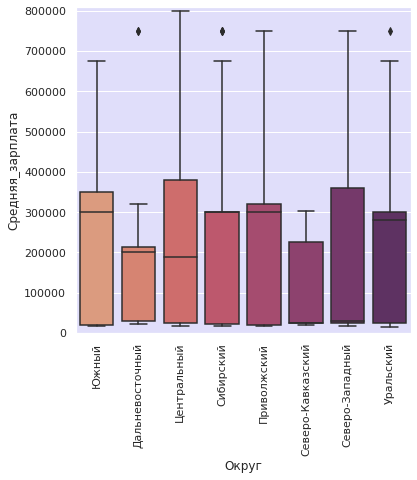

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x='Округ', y='Средняя_зарплата', data=dfVacancys, palette='flare')
plt.ylim(0,810000)

*  В цикле присваиваем ключу в словаре данные, и оцениваем с помощью критерия Краскала-Уоллиса

In [ ]:
federal_dict = {}
for j in range(len(federal)):
  federal_dict[f'dfd{j}'] = federal_dict.get(f'dfd{j}', np.array(dfVacancys[dfVacancys['Округ']==f'{federal[j]}']['Средняя_зарплата']))
stats.mstats.kruskalwallis(federal_dict['dfd0'],federal_dict['dfd1'],federal_dict['dfd2'],federal_dict['dfd3'],federal_dict['dfd4'],federal_dict['dfd5'],federal_dict['dfd6'],federal_dict['dfd7'])

KruskalResult(statistic=43.94856277415113, pvalue=2.186660244282131e-07)

**Вывод**

* Так как полученное значение p-value < 0.05 (уровень значимости), то при уровне значимости 0.05 гипотеза Н0 отклоняется. Следовательно значение федерального округа значительно влияет на зарплату соискателя.

# Гипотеза №3 Цена за курс напрямую зависит от компании?

**Структурированные данные для проверки гипотезы №3**

In [ ]:
dfCourses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 642
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Название      563 non-null    object 
 1   Компания      563 non-null    object 
 2   Цена          563 non-null    int64  
 3   РейтингКомп   563 non-null    float64
 4   РейтингКурса  563 non-null    float64
 5   НавыкиПриобр  563 non-null    object 
 6   ЧасыОб        563 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


**Тип данных**

- 0   Название ---- Категориальный показатель 
- 1   Компания ---- Категориальный показатель
- 2   Цена ---- Количественный показатель  
- 3   РейтингКомп ---- Порядковый показатель
- 4   РейтингКурса ----Порядковый показатель
- 5   НавыкиПриобр ---- Категориальный показатель
- 6   ЧасыОб ---- Количественный показатель

**Визуализация (табличная и | или графическая)**

*  Построим barplot с компаниями и среднюю цену их курсов

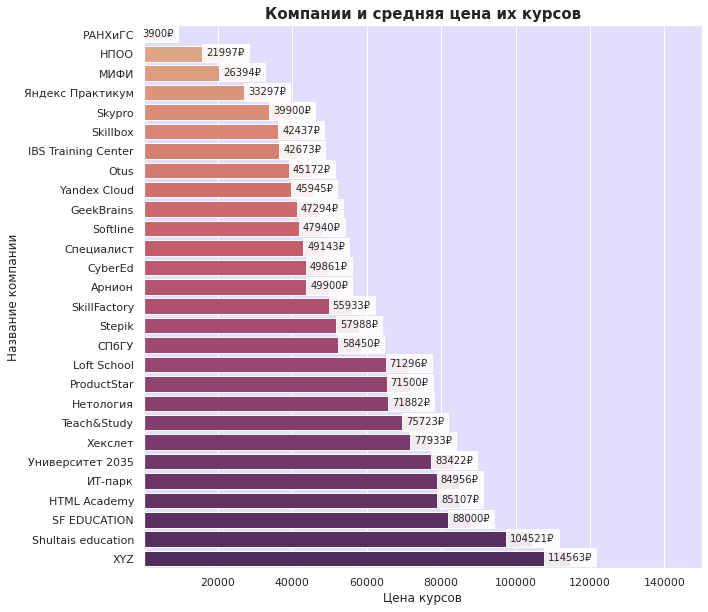

In [ ]:
sorted_barplot = dfCourses.groupby(["Компания"])['Цена'].aggregate(np.mean).reset_index().sort_values('Цена',)

plt.figure(figsize=(10, 10))
plt.xlim(2.5,150000)
axf = sns.barplot(data=dfCourses, x=dfCourses['Цена'], y=dfCourses['Компания'], palette='flare',ci=None, order=sorted_barplot['Компания'])
rct = axf.patches
lblz = [f"{int(i)}₽" for i in sorted_barplot['Цена']]
i = -0.60
plt.ylabel('Название компании')
plt.xlabel('Цена курсов')
plt.title('Компании и средняя цена их курсов',fontweight="bold",fontsize=15)
for rect, label in zip(rct, lblz):
    height = rect.get_height()
    axf.text(
        rect.get_x() + rect.get_width() / 1, height+i, label, ha="center",
         va="bottom", bbox=dict(facecolor='white', alpha=0.9),
        fontsize=10)
    i += 1

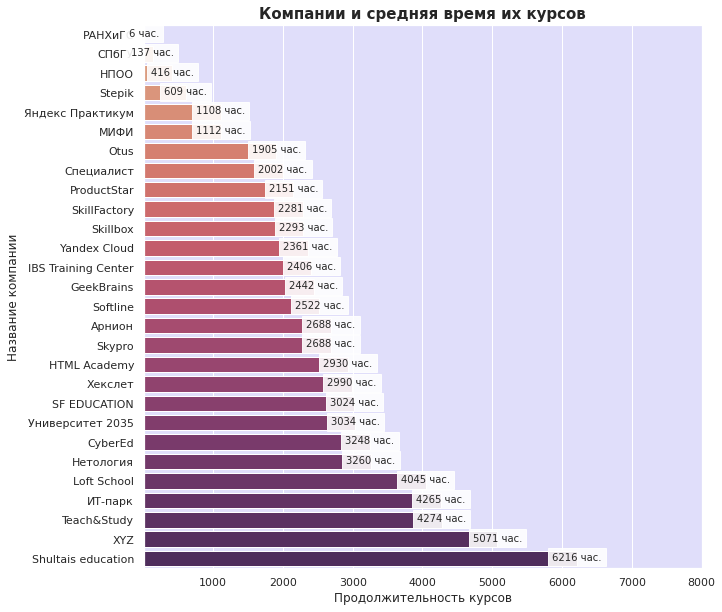

In [ ]:
sorted_barplot = dfModelRegress.groupby(["Компания"])['ЧасыОб'].aggregate(np.mean).reset_index().sort_values('ЧасыОб')

plt.figure(figsize=(10, 10))
plt.xlim(2.5,8000)
axf = sns.barplot(data=dfModelRegress, x=dfModelRegress['ЧасыОб'], y=dfModelRegress['Компания'], palette='flare',ci=None, order=sorted_barplot['Компания'])
rct = axf.patches
lblz = [f"{int(i)} час." for i in sorted_barplot['ЧасыОб']]
i = -0.60
plt.ylabel('Название компании')
plt.xlabel('Продолжительность курсов')
plt.title('Компании и средняя время их курсов',fontweight="bold",fontsize=15)
for rect, label in zip(rct, lblz):
    height = rect.get_height()
    axf.text(
        rect.get_x() + rect.get_width() / 1, height+i, label, ha="center",
         va="bottom", bbox=dict(facecolor='white', alpha=0.9),
        fontsize=10)
    i += 1

**Выбранный метод анализа**

* Так как цена является количественным типом, а компании порядковыми, и мы их проверили  на нормальность (распредление обоих не нормальное), далее мы проверяем на кол-во групп, их у нас > 2, зависимость у данных отсутствует, следовательно из этого мы выбираем метод **Краскала-Уоллиса**

**Результат реализации метода**

*  Построим boxplot компании и цены их курсов

(-2.0, 200000.0)

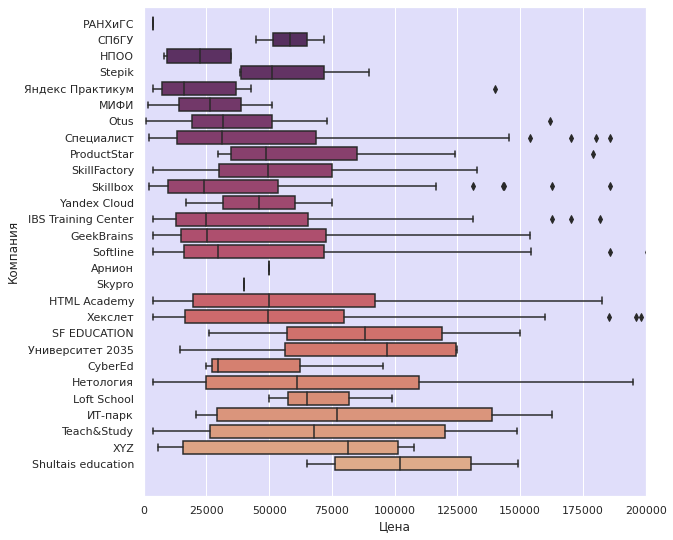

In [ ]:

f, ax = plt.subplots(figsize=(9, 9))
fig = sns.boxplot(x='Цена', y='Компания', data=dfCourses, palette='flare', order=sorted_barplot['Компания'][::-1],)
plt.ylim(-2,28)
plt.xlim(-2,200000)

*  Проверим гипотезу по критерию Краскала-Уоллиса

In [ ]:
pattern_comp = ['IBS Training Center', 'Skillbox', 'Хекслет', 'GeekBrains', 'Softline',
       'Специалист', 'Otus', 'Нетология', 'HTML Academy', 'SkillFactory',
       'Teach&Study', 'ProductStar', 'Яндекс Практикум', 'XYZ', 'ИТ-парк',
       'Stepik', 'Shultais education', 'Университет 2035', 'НПОО', 'CyberEd',
       'Loft School', 'Yandex Cloud', 'СПбГУ', 'SF EDUCATION', 'МИФИ',
       'Арнион', 'Skypro', 'РАНХиГС']

comp_dict = {}
for j in range(len(pattern_comp)):
  comp_dict[f'dfk{j}'] = comp_dict.get(f'dfk{j}', np.array(dfCourses[dfCourses['Компания']==f'{pattern_comp[j]}']['Цена']))
stats.mstats.kruskalwallis(comp_dict['dfk0'],comp_dict['dfk1'],comp_dict['dfk2'],comp_dict['dfk3'],comp_dict['dfk4'],comp_dict['dfk5'],comp_dict['dfk6'],comp_dict['dfk7'],
                           comp_dict['dfk8'],comp_dict['dfk9'],comp_dict['dfk10'],comp_dict['dfk11'],comp_dict['dfk12'],
                           comp_dict['dfk13'],comp_dict['dfk14'],comp_dict['dfk15'],comp_dict['dfk16'],comp_dict['dfk17'],
                           comp_dict['dfk18'],comp_dict['dfk19'],comp_dict['dfk20'],comp_dict['dfk21'],comp_dict['dfk22'],
                           comp_dict['dfk23'],comp_dict['dfk24'],comp_dict['dfk25'],comp_dict['dfk26'],comp_dict['dfk27']
                           )


KruskalResult(statistic=42.87140760234816, pvalue=0.026951640102014937)

**Вывод**

Так как полученное значение p-value < 0.05 (уровень значимости), то при уровне значимости 0.05 гипотеза Н0 отклоняется. Следовательно компания незначительно, но влияет на стоимость курсов.

# Гипотеза №4 Владение навыками из требуемых ТОП 10 значимо повышает заработную плату?

**Структурированные данные для проверки гипотезы №4**

In [ ]:
dfVacancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20862 entries, 1 to 145990
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Должность         20862 non-null  object        
 1   Подспециализация  20862 non-null  object        
 2   Специализация     20862 non-null  object        
 3   Средняя_зарплата  20862 non-null  float64       
 4   Округ             20862 non-null  object        
 5   Навыки            20862 non-null  object        
 6   Дата              20862 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.8+ MB


**Тип данных**

- 0   Должность ---- Категориальный показатель                                                                   
- 1   Подспециализация ---- Категориальный показатель      
- 2   Специализация ---- Категориальный показатель      
- 3   Средняя_зарплата ---- Количественный показатель  
- 4   Округ ---- Категориальный показатель        
- 5   Навыки ----  Категориальный показатель  
- 6   Дата  ---- Порядковый показатель

**Визуализация (табличная и | или графическая)**

*  Построим barplot ТОП 10 навыков из датасета и кол-во вакансий содержащих их название

[]

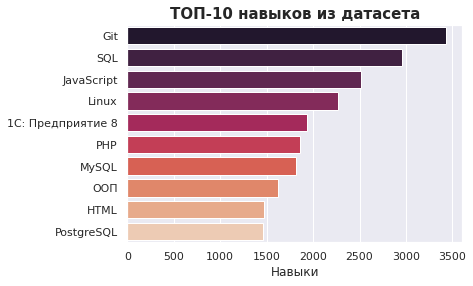

In [ ]:
skill = dfVacancy['Навыки'].explode().value_counts()

sns.set_theme(style="darkgrid", palette="rocket")
x = skill.index[:10]
y1 = skill[:10]


sns.barplot(y=x, x=y1, palette="rocket")
plt.title('ТОП-10 навыков из датасета',fontweight="bold",fontsize=15)
plt.xticks(rotation= 0)
plt.setp(f.axes, xticks=[])

**Выбранный метод анализа**

* Так как зарплата является количественным типом, а навыки порядковыми, и мы их проверили  на нормальность (распредление обоих не нормальное), далее мы проверяем на кол-во групп, их у нас > 2, зависимость у данных отсутствует, следовательно из этого мы выбираем метод **Краскала-Уоллиса**

**Результат реализации метода**

*  Найдем все вакансии в которых указываются эти 10 навыков, отфильтруем и получим 10 групп с кол-вом вакансий.

In [ ]:
pattern_skill = [i for i in skill.index[:10]]

def skill_salary(skill):
  try:
      cnt = 0
      for i in range(len(pattern_skill)):
        if pattern_skill[i] in skill:
          return pattern_skill[i]
  except:
    return 0

dfVacancy['Навыки'] = dfVacancy['Навыки'].apply(skill_salary)

In [ ]:
dfVacancys = dfVacancy

for i in range(len(pattern_skill)):
    percentile3 = np.percentile(dfVacancy[dfVacancy['Навыки'] == f'{pattern_skill[i]}']['Средняя_зарплата'].dropna(), 2) # 3% процентиль
    percentile97 = np.percentile(dfVacancy[dfVacancy['Навыки'] == f'{pattern_skill[i]}']['Средняя_зарплата'].dropna(), 97) # 97% процентиль
    dfVacancys = dfVacancys.drop(dfVacancys.loc[(dfVacancy['Навыки'] == f'{pattern_skill[i]}') & (dfVacancys['Средняя_зарплата'] > percentile3) & (dfVacancys['Средняя_зарплата'] < percentile97)].index)

(0.0, 800000.0)

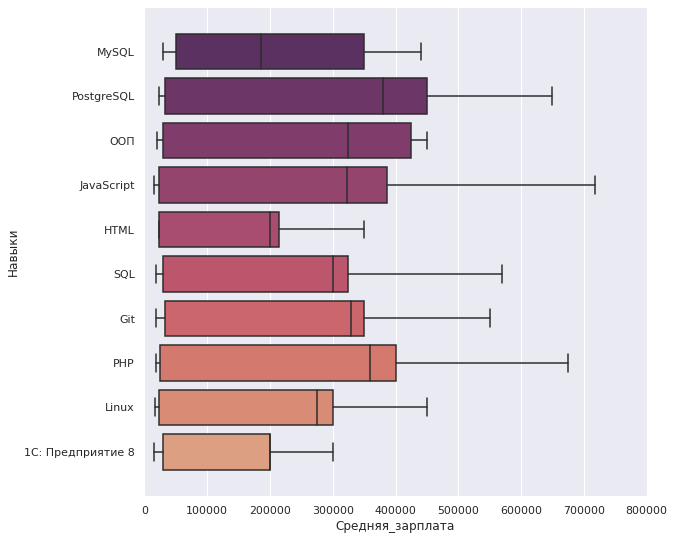

In [ ]:
f, ax = plt.subplots(figsize=(9, 9))
fig = sns.boxplot(y='Навыки', x='Средняя_зарплата', data=dfVacancys, palette='flare')
plt.ylim(-1,10)
plt.xlim(0,800000)

In [ ]:

comp_dict = {}
for j in range(len(pattern_skill)):
  comp_dict[f'dfsk{j}'] = comp_dict.get(f'dfsk{j}', np.array(dfVacancy[dfVacancy['Навыки']==f'{pattern_skill[j]}']['Средняя_зарплата']))
stats.mstats.kruskalwallis(comp_dict['dfsk0'],comp_dict['dfsk1'],comp_dict['dfsk2'],comp_dict['dfsk3'],comp_dict['dfsk4'],comp_dict['dfsk5'],comp_dict['dfsk6'],comp_dict['dfsk7'],
                           comp_dict['dfsk8'],comp_dict['dfsk9']
                           )

KruskalResult(statistic=942.9483480440028, pvalue=3.436017757828256e-197)

**Вывод**

Так как полученное значение p-value < 0.05 (уровень значимости), то при уровне значимости 0.05 гипотеза Н0 отклоняется. Следовательно мы с большой уверенностью можем сказать что навыки из топ 10 имеют значительное влияние на заработную плату.

# Гипотеза №5 Цена за курс напрямую зависит от получаемых навыков?

**Структурированные данные для проверки гипотезы №5**

In [ ]:
dfCourses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 642
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Название      563 non-null    object 
 1   Компания      563 non-null    object 
 2   Цена          563 non-null    int64  
 3   РейтингКомп   563 non-null    float64
 4   РейтингКурса  563 non-null    float64
 5   НавыкиПриобр  563 non-null    object 
 6   ЧасыОб        563 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


**Тип данных**

- 0   Название ---- Категориальный показатель 
- 1   Компания ---- Категориальный показатель
- 2   Цена ---- Количественный показатель  
- 3   РейтингКомп ---- Порядковый показатель
- 4   РейтингКурса ----Порядковый показатель
- 5   НавыкиПриобр ---- Категориальный показатель
- 6   ЧасыОб ---- Количественный показатель

**Визуализация (табличная и | или графическая)**

*  Переводим навыки в список

In [ ]:
import re

def skills_cours(skills):
  a = skills.split(',')
  res = []
  for b in a:
    buff = ''
    for i in range(len(b)):
      if b[i] not in (']','[',',',"'"):
        buff += b[i].lstrip()
    res.append(buff)
  return res

dfCourses['НавыкиПриобр'] = dfCourses['НавыкиПриобр'].apply(skills_cours)


*  Выявляем топ 10 навыков

In [ ]:
dfCourses['НавыкиПриобр'].explode().value_counts()[:10]


JavaScript    102
Git            86
Python         79
API            72
SQL            70
CSS            65
ООП            64
HTML+CSS       63
Linux          58
Java           43
Name: НавыкиПриобр, dtype: int64

In [ ]:
pattern_skill_courses = [i for i in dfCourses['НавыкиПриобр'].explode().value_counts()[:10].index]

def skill_salary(skill):
  try:
      cnt = 0
      for i in range(len(pattern_skill_courses)):
        if pattern_skill_courses[i] in skill:
          return pattern_skill_courses[i]
  except:
    return 0

dfCoursesH1['НавыкиПриобр'] = dfCourses['НавыкиПриобр'].apply(skill_salary)

**Выбранный метод анализа**

* Так как цена курса является количественным типом, а навыки порядковыми, и мы их проверили  на нормальность (распредление обоих не нормальное), далее мы проверяем на кол-во групп, их у нас > 2, зависимость у данных отсутствует, следовательно из этого мы выбираем метод **Краскала-Уоллиса**

**Результат реализации метода**

(0.0, 200000.0)

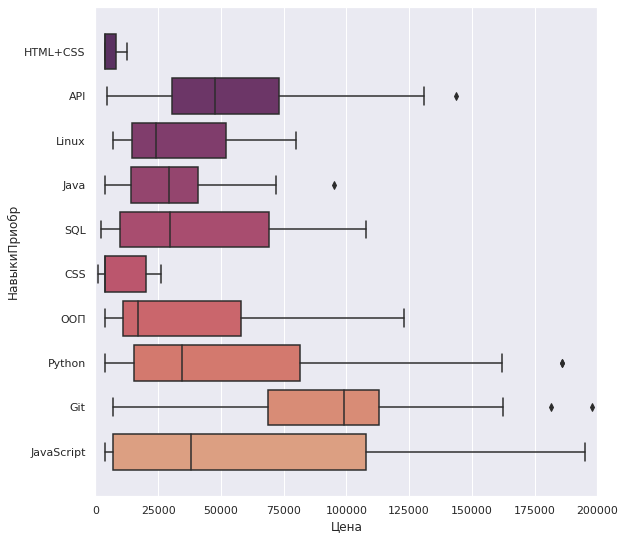

In [ ]:
f, ax = plt.subplots(figsize=(9, 9))
fig = sns.boxplot(y='НавыкиПриобр', x='Цена', data=dfCoursesH1, palette='flare')
plt.ylim(-1,10)
plt.xlim(0,200000)

In [ ]:
cours_dict = {}
for j in range(len(pattern_skill_courses)):
  cours_dict[f'cdf{j}'] = cours_dict.get(f'cdf{j}', np.array(dfVacancy[dfVacancy['Навыки']==f'{pattern_skill_courses[j]}']['Средняя_зарплата']))
stats.mstats.kruskalwallis(cours_dict['cdf0'],cours_dict['cdf1'],cours_dict['cdf2'],cours_dict['cdf3'],cours_dict['cdf4'],cours_dict['cdf5'],cours_dict['cdf6'],cours_dict['cdf7'],
                           cours_dict['cdf8'],cours_dict['cdf9']
                           )

KruskalResult(statistic=491.953041538561, pvalue=3.0369400101100276e-100)

**Вывод**

Так как полученное значение p-value < 0.05 (уровень значимости), то при уровне значимости 0.05 гипотеза Н0 отклоняется. Следовательно мы с большой уверенностью можем сказать что навыки из топ 10 имеют значительное влияние на стоимость курса.

# Гипотеза №6 Зарплата напрямую зависит от специализации?

**Структурированные данные для проверки гипотезы №6**

In [ ]:
dfVacancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20862 entries, 1 to 145990
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Должность         20862 non-null  object        
 1   Подспециализация  20862 non-null  object        
 2   Специализация     20862 non-null  object        
 3   Средняя_зарплата  20862 non-null  float64       
 4   Округ             20862 non-null  object        
 5   Навыки            10797 non-null  object        
 6   Дата              20862 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.8+ MB


**Тип данных**

- 0   Должность ---- Категориальный показатель                                                                   
- 1   Подспециализация ---- Категориальный показатель      
- 2   Специализация ---- Категориальный показатель      
- 3   Средняя_зарплата ---- Количественный показатель  
- 4   Округ ---- Категориальный показатель        
- 5   Навыки ----  Категориальный показатель  
- 6   Дата  ---- Порядковый показатель

**Визуализация (табличная и | или графическая)**

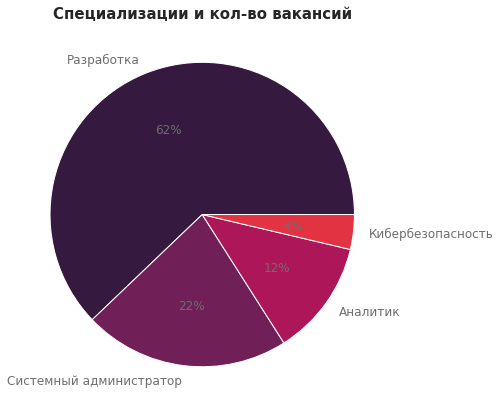

In [ ]:
special = dfVacancy['Специализация'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(special, labels = special.index, textprops=
        {'fontsize':12, 'color':'#6e6e6e'} , labeldistance=1.1, colors=colors,autopct='%.0f%%')
plt.title('Специализации и кол-во вакансий', fontweight="bold",fontsize=15)
plt.show()

**Выбранный метод анализа**

* Так как зарплата является количественным типом, а специализация порядковыми, и мы их проверили  на нормальность (распредление обоих не нормальное), далее мы проверяем на кол-во групп, их у нас > 2, зависимость у данных отсутствует, следовательно из этого мы выбираем метод **Краскала-Уоллиса**

**Результат реализации метода**

In [ ]:
dfVacancys = dfVacancy
patt_spec = ['Разработка','Системный администратор','Аналитик','Кибербезопасность'] 

for i in range(len(patt_spec)):
    percentile3 = np.percentile(dfVacancy[dfVacancy['Специализация'] == f'{patt_spec[i]}']['Средняя_зарплата'].dropna(), 2) # 3% процентиль
    percentile97 = np.percentile(dfVacancy[dfVacancy['Специализация'] == f'{patt_spec[i]}']['Средняя_зарплата'].dropna(), 97) # 97% процентиль
    dfVacancys = dfVacancys.drop(dfVacancys.loc[(dfVacancy['Специализация'] == f'{patt_spec[i]}') & (dfVacancys['Средняя_зарплата'] > percentile3) & (dfVacancys['Средняя_зарплата'] < percentile97)].index)

(0.0, 810000.0)

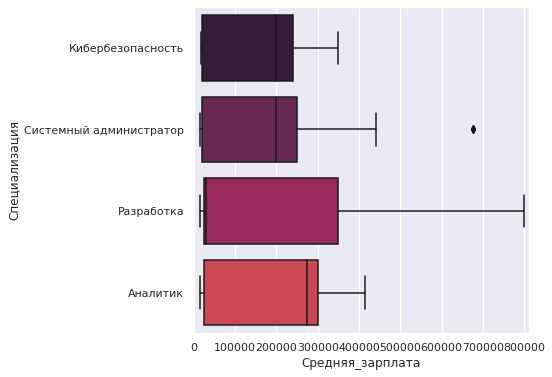

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(y='Специализация', x='Средняя_зарплата', data=dfVacancys)
plt.xlim(0,810000)


In [ ]:
spec_dict = {}
for j in range(len(patt_spec)):
  spec_dict[f'spdf{j}'] = spec_dict.get(f'spdf{j}', np.array(dfVacancys[dfVacancys['Специализация']==f'{patt_spec[j]}']['Средняя_зарплата']))
stats.mstats.kruskalwallis(spec_dict['spdf0'],spec_dict['spdf1'],spec_dict['spdf2'],spec_dict['spdf3']
                           )

KruskalResult(statistic=72.94871435180903, pvalue=9.96947766611981e-16)

**Вывод**


Так как полученное значение p-value < 0.05 (уровень значимости), то при уровне значимости 0.05 гипотеза Н0 отклоняется. Следовательно мы с большой уверенностью можем сказать что специализация играет значительную роль в заработной плате.

# 5.Построение модели связи целевого показателя в зависимости от факторов


In [ ]:
dfModelRegress['НавыкиПриобр'] = dfModelRegress['НавыкиПриобр'].apply(skills_cours)

*  Переводим название навыков в кол-во, при сборке курса по модели, мы сможем вводить кол-во навыков, время обучения и будем получать ценну на такой курс.

In [ ]:
def skills_num(skill):
  return len(skill)

dfModelRegress['НавыкиПриобр'] = dfModelRegress['НавыкиПриобр'].apply(skills_num)


*  Определяем факторы для определения связи с целевым показателем (цена курса)

In [ ]:
X=dfModelRegress[['ЧасыОб','НавыкиПриобр']]

In [ ]:
LR = lm.LinearRegression()

*   Целевой показатель (Цена курса)

In [ ]:
mod_m = LR.fit(X,dfModelRegress[['Цена']])

In [ ]:
mod_m.intercept_, mod_m.coef_

(array([17457.31409606]), array([[14.58209904, 91.09574281]]))

In [ ]:
r2 = mod_m.score(X,dfModelRegress[['Цена']])
r2

0.6100688310910884

* Теперь с помощью модели, мы можем определить цену курса, с кол-вом предметов.
  * Для нашего заказчика мы определим курсы следующих типов:
      - Диапазон цен для коротких курсов, диапазон цены 1 - 3 месяца (5-10 навыков):  от 28762₽ - до 50945₽
      - Диапазон цен для средней продолжительности курсов 3 - 9 месяцев(10-20 навыков: от 50945₽ до 113771₽
      - Диапазон цен для длительных курсов от 9 до 16 месяцев(20 - 50 навыков):от 113771₽ до 189998₽

* Диапазон цен для коротких курсов, диапазон цены 1 - 3 месяца (5-10 навыков):

In [ ]:
x_new_fl = [[744,5]]
x_new_fl_2 = [[2234,10]]


In [ ]:
y_new_fl=mod_m.predict(x_new_fl)
print("Прогноз цены: ",y_new_fl.round(0))
y_new_fl=mod_m.predict(x_new_fl_2)
print("Прогноз цены: ",y_new_fl.round(0))

Прогноз цены:  [[28762.]]
Прогноз цены:  [[50945.]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


*  Диапазон цен для средней продолжительности курсов 3 - 9 месяцев(10-20 навыков):

In [ ]:
x_new_fl_3 = [[6480,20]]
y_new_fl=mod_m.predict(x_new_fl_2)
print("Прогноз цены: ",y_new_fl.round(0))
y_new_fl=mod_m.predict(x_new_fl_3)
print("Прогноз цены: ",y_new_fl.round(0))

Прогноз цены:  [[50945.]]
Прогноз цены:  [[113771.]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


*  Диапазон цен для длительных курсов от 9 до 16 месяцев(20 - 50 навыков)

In [ ]:
x_new_fl_4 = [[11520,50]]
y_new_fl=mod_m.predict(x_new_fl_3)
print("Прогноз цены: ",y_new_fl.round(0))
y_new_fl=mod_m.predict(x_new_fl_4)
print("Прогноз цены: ",y_new_fl.round(0))

Прогноз цены:  [[113771.]]
Прогноз цены:  [[189998.]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# Итоговые выводы:

*  **Подтвердили гипотезу №1** о зависимости цены за курс с его продолжительностью, далее с помощью построенной модели сгенерировали оптимальные цены на курсы исходя из факторов (Срок обучения и кол-во осваиваемых навыков)
      - Диапазон цен для коротких курсов, диапазон цены 1 - 3 месяца (5-10 навыков):  от 28762₽ - до 50945₽
      - Диапазон цен для средней продолжительности курсов 3 - 9 месяцев(10-20 навыков: от 50945₽ до 113771₽
      - Диапазон цен для длительных курсов от 9 до 16 месяцев(20 - 50 навыков):от 113771₽ до 189998₽

* **Подтвердили гипотезу №2** о зависимости федерального округа и заработной плате для специалистов. Лидеры по верхней планке зарплаты:
      - Северо-Западный округ
      - Центральный
      - Южный

* **Подтвердили гипотезу №3** о зависимости компании и цены курса. Зависимость проявлялась в кореляции со средней продолжительностью курсов:
      - Таким образом, цена всеравно меняется в зависимости от продолжительности курса, какие то компании делают короткие курсы - дешевле, какие то дольше - дороже

* **Подтвердили гипотезу №4** о повышении заработной платы обладая каким то навыком из ТОП 10:
  Следующие навыки выделены как большие возможности для роста заработной платы:
       - PostgreSQL, MySql - их можно отнести в работу с БД (SQL)
       - JavaScript
       - PHP
       - Linux
       - Git

* **Подтвердили гипотезу №5** о том что цена курса зависит от кол-ва получаемых навыков.
          Чем больше навыков, тем курс получается дольше, и тут опять же вазимосвязь идет и с продолжительностью обучения.

* **Подтвердили гипотезу №6** о том что зарплата зависит от специализации.
      - Разработка имеет большой разброс, начальные зарплаты могут быть небольшими, но рост может быть больше чем в других специализациях, таких как Сис.админ, Аналитика, Безопасность.
      - Другие специализации имееют почти идентичные данные, как медиану так и максимальную планку зарплат.

* **Дополнительно** оценили для каждой группы специализации, 15 навыков, которые требуются на рынке труда. Что поможет нашему заказчику собирать гибкие инструменты под специализацию и тем самым быть в тренде рынка и тренде онлайн курсов.